In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, shapiro, normaltest
from scipy import stats

Загрузить выборку из файла “VarN.txt”, где N – номер варианта?он же номер в списке
подгруппы (см. таблицу с текущим рейтингом). Необходимо проверить, что данная вам выборка
принадлежит нормальному закону распределений с одним из двух наборов параметров (см. таблицу
ниже). Мой вариант - 13.

In [28]:
data = np.loadtxt("/var13.txt")

Провести визуальный анализ выборки, то есть вывести: а) график реализации; б) гистограмму (постройте несколько гистограмм с разным числом интервалов: I) небольшим: 2-3; II) средним – можно выбрать по правилу Стёрджиса:
, III) большим: порядка 30 или даже более). Прокомментировать полученные изображения.

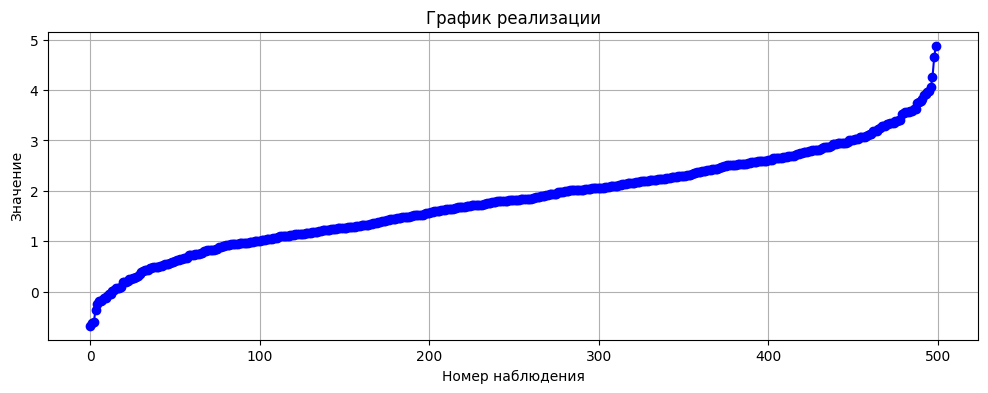

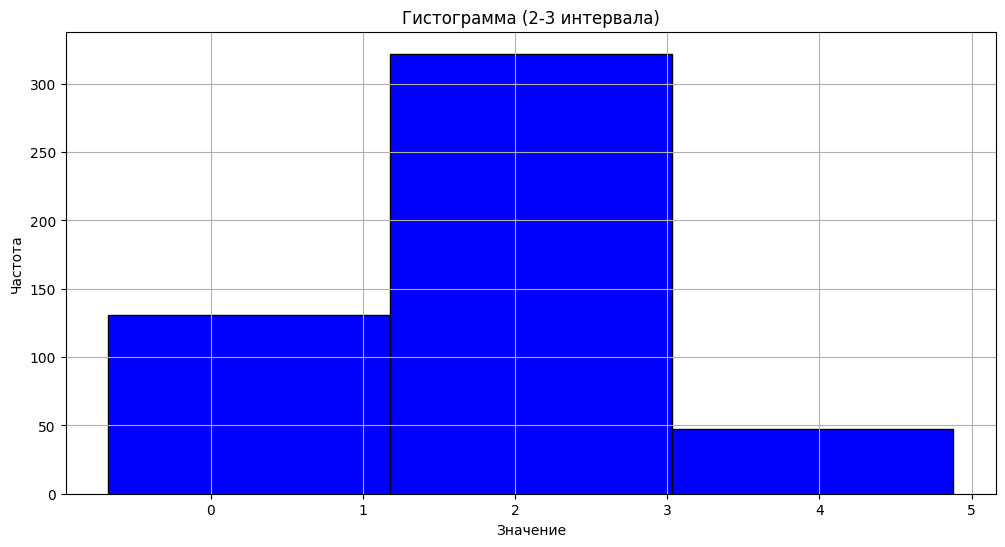

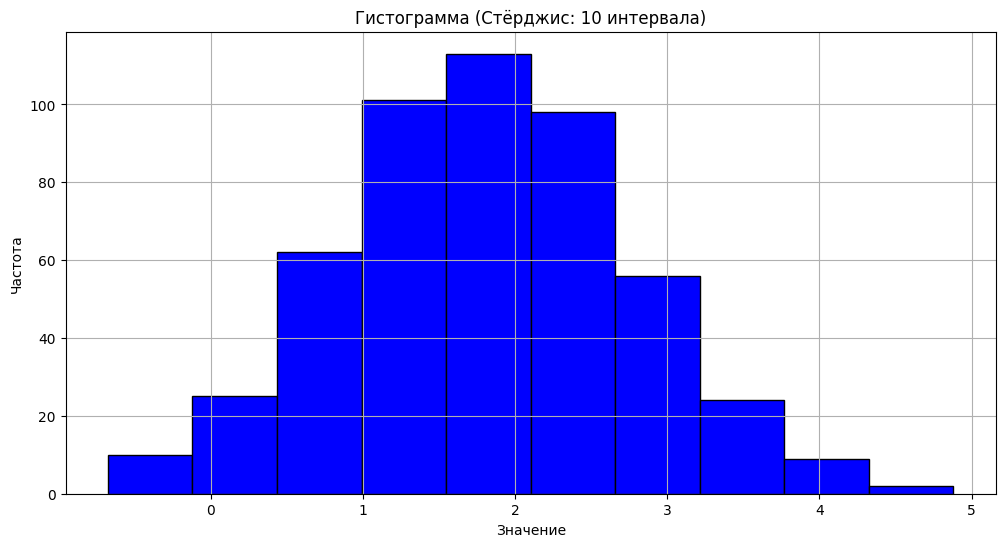

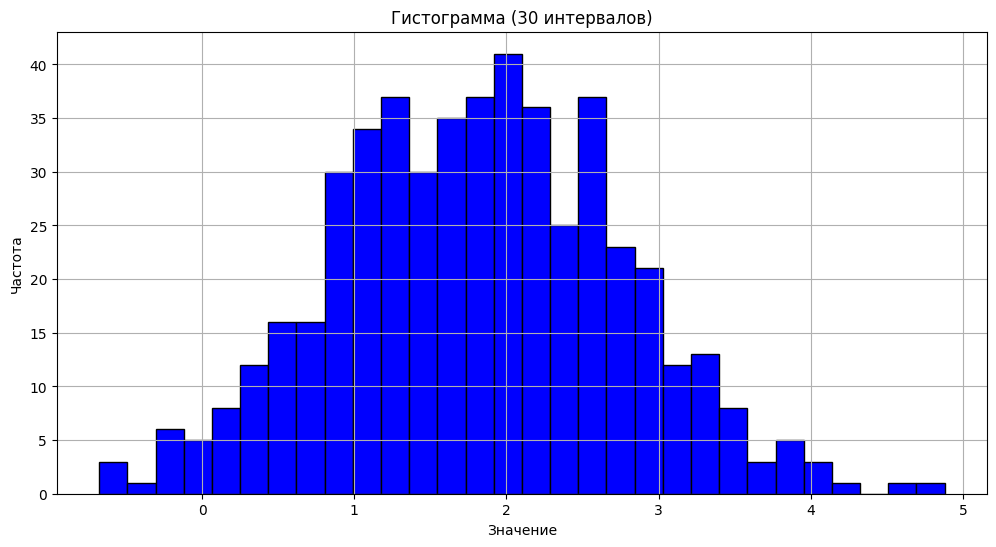

In [29]:
plt.figure(figsize=(12, 4))
plt.plot(sorted(data), marker='o', linestyle='-', color='b')
plt.title('График реализации')
plt.xlabel('Номер наблюдения')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

# 3 интервала
plt.figure(figsize=(12, 6))
plt.hist(data, bins=3, color='b', edgecolor='black')
plt.title('Гистограмма (2-3 интервала)')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Правило Стёрджиса
sturges_bins = int(np.ceil(1 + np.log2(len(data))))
plt.figure(figsize=(12, 6))
plt.hist(data, bins=sturges_bins, color='b', edgecolor='black')
plt.title(f'Гистограмма (Стёрджис: {sturges_bins} интервала)')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# 30 интервалов
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, color='b', edgecolor='black')
plt.title('Гистограмма (30 интервалов)')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Вычислить числовые характеристики выборки: среднее, дисперсию, стандартное отклонение, медиану, первую и третью квартиль, минимальное и максимальное значение выборки. Сопоставьте эти параметры с теоретическими.

In [30]:
print(f"Среднее значение: {np.mean(data)}")
print(f"Дисперсия: {np.var(data)}")
print(f"Стандартное отклонение: {np.std(data)}")
print(f"Медиана: {np.median(data)}")
print(f"Первый квартиль (Q1): {np.percentile(data, 25)}")
print(f"Третий квартиль (Q3): {np.percentile(data, 25)}")
print(f"Минимальное значение: {np.min(data)}")
print(f"Максимальное значение: {np.max(data)}")

theoretical_mean = 1.8
theoretical_std_deviation = 1

print("\nСравнение с теоретическими параметрами:")
print(f"Среднее (теоретическое): {theoretical_mean:.2f}")
print(f"Стандартное отклонение (теоретическое): {theoretical_std_deviation:.2f}\n")

Среднее значение: 1.813148787604
Дисперсия: 0.8849654445739409
Стандартное отклонение: 0.94072601993032
Медиана: 1.8135755
Первый квартиль (Q1): 1.14862375
Третий квартиль (Q3): 1.14862375
Минимальное значение: -0.6771383
Максимальное значение: 4.880125

Сравнение с теоретическими параметрами:
Среднее (теоретическое): 1.80
Стандартное отклонение (теоретическое): 1.00



С помощью теста Шапиро-Уилка проверить, что данная вам выборка принадлежит к заданному закону распределения. (Используйте готовую реализацию теста).

In [31]:
statistic, p_value = shapiro(data)

alpha = 0.05
print(f"Статистика теста: {statistic:.4f}")
print(f"P-значение: {p_value:.4f}")

if p_value > alpha:
    print("Выборка похожа на нормальное распределение (не отвергаем нулевую гипотезу)")
else:
    print("Выборка не похожа на нормальное распределение (отвергаем нулевую гипотезу)")


Статистика теста: 0.9982
P-значение: 0.8934
Выборка похожа на нормальное распределение (не отвергаем нулевую гипотезу)


Изучить, построить и прооинтерпретировать ящик с усами (box plot).

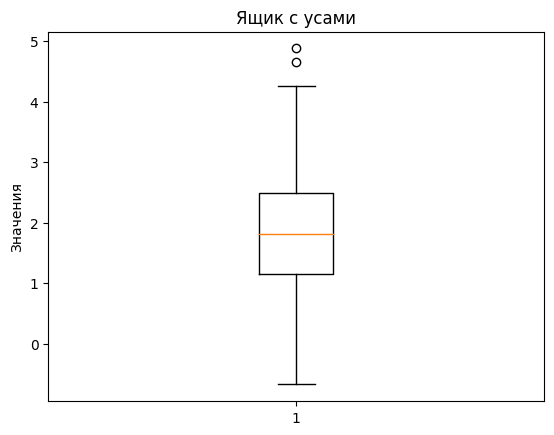

In [32]:
plt.boxplot(data)
plt.title("Ящик с усами")
plt.ylabel('Значения')
plt.savefig("boxplot.png")
plt.show()

Построить и проинтерпретировать: график эмпирической функции распределения;

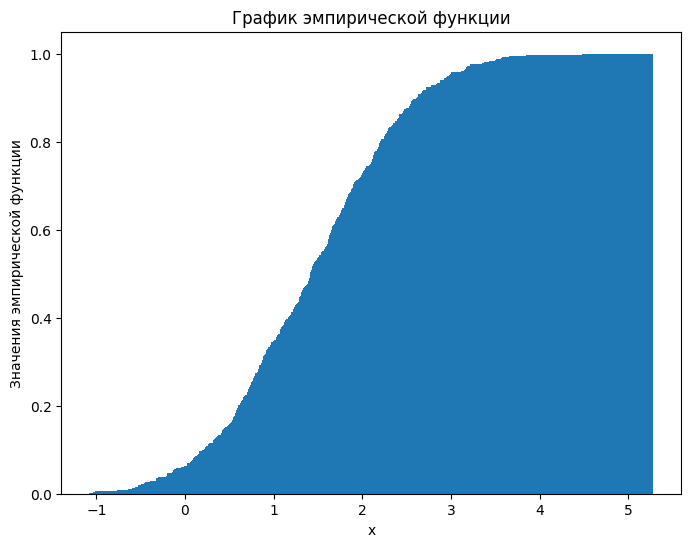

In [33]:
answer = dict()
n = len(data)
for i in range(0, n):
    count = 0
    for j in range(0, n):
        if data[i] >= data[j]:
           count+=1
    answer[data[i]] = count / n
keys = list(answer.keys())
values = list(answer.values())
plt.figure(figsize=(8, 6))
plt.bar(keys, values)
plt.xlabel('x')
plt.ylabel('Значения эмпирической функции')
plt.title('График эмпирической функции')
plt.show()

Построить и проинтерпретировать: q-q график;

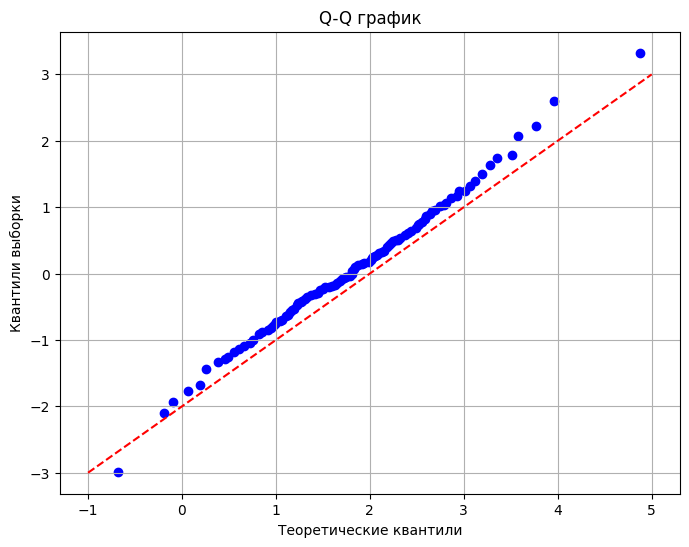

In [34]:
# Вычислите квантили теоретического распределения (например, нормального)
theoretical_quantiles = np.percentile(data, np.arange(0, 101))

# Вычислите квантили выборки
sample_quantiles = np.percentile(np.random.normal(0, 1, len(data)), np.arange(0, 101))

# Строим Q-Q график
plt.figure(figsize=(8, 6))
plt.scatter(theoretical_quantiles, sample_quantiles, color='blue', marker='o')
plt.xlabel('Теоретические квантили')
plt.ylabel('Квантили выборки')
plt.title('Q-Q график')
plt.grid(True)

# Добавляем линию y=x (линию идентичности)
plt.plot([-1, 5], [-3, 3], color='red', linestyle='--')
plt.savefig("q-q.png")
plt.show()

(1 балл) Вычислите, какова доля тех наблюдений, которые попали в интервал x − 3s, x + 3s,
где x – выборочное среднее, s – выборочная оценка стандартного отклонения. Согласуется ли
практический результат с теорией?

In [35]:
x = np.mean(data)
s = np.std(data, ddof=1)

lower_bound = x - 3 * s
upper_bound = x + 3 * s

observations_in_interval = len([x_i for x_i in data if lower_bound <= x_i <= upper_bound])
fraction_in_interval = observations_in_interval / len(data)

print("Доля наблюдений, попавших в интервал:", fraction_in_interval)

Доля наблюдений, попавших в интервал: 0.996


Проверить гипотезы согласия о принадлежности выборки к нормальному закону распределения с использованием одного из следующих статистических тестов: хи-квадрат Пирсона, Колмогорова-Смирнова, любой другой, какой сможете найдете.

In [36]:
mu = 1.8
sigma = 1

ks_statistic, p_value = stats.kstest(data, 'norm', args=(mu, sigma))
alpha = 0.05

# Выводим результаты
print(f"Статистика Колмогорова-Смирнова: {ks_statistic}")
print(f"p-значение: {p_value}")

# Проводим статистический тест
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: выборка не соответствует нормальному распределению")
else:
    print("Нет оснований отвергать нулевую гипотезу: выборка соответствует нормальному распределению")

# Выполнить критерий согласия Пирсона
chi2_stat, p_value = stats.normaltest(data)

alpha = 0.05
print("Статистика критерия:", chi2_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Выборка не похожа на нормальное распределение (отвергается H0)")
else:
    print("Выборка похожа на нормальное распределение (не отвергается H0)")

Статистика Колмогорова-Смирнова: 0.02950347145804358
p-значение: 0.7652436752880298
Нет оснований отвергать нулевую гипотезу: выборка соответствует нормальному распределению
Статистика критерия: 0.7149074059151632
p-value: 0.6994550808946791
Выборка похожа на нормальное распределение (не отвергается H0)


Реализовать следующие тести проверки гипотез согласия: хи-квадрат
критерий Пирсона;

In [38]:
statistic, p_value = normaltest(data)

alpha = 0.05

if p_value < alpha:
    print("данные не принадлежат нормальному распределению по критерию Пирсона.")
else:
    print("данные могут принадлежать нормальному распределению по критерию Пирсона.")

данные могут принадлежать нормальному распределению по критерию Пирсона.
